Imports and data consolidation

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
natl_park_total_data = pd.read_csv('Totalvisits.csv')
natl_park_visitors = natl_park_total_data[['Year','RecreationVisitors']]
us_median_income = pd.read_csv('usincome.csv')
us_median_income['DATE'] = pd.to_datetime(us_median_income['DATE'])
us_median_income['DATE'] = pd.DatetimeIndex(us_median_income['DATE']).year
us_median_income['DATE'] = pd.to_numeric(us_median_income['DATE'])
us_median_income = us_median_income.rename(columns={'DATE': 'Year', 'MEHOINUSA672N': 'US Median Income'})
us_gas = pd.read_csv('usgas.csv')
us_gas = us_gas.rename(columns={'U.S. All Grades All Formulations Retail Gasoline Prices Dollars per Gallon': 'Avg Gas Price'})
economic_factors = pd.merge(us_median_income, us_gas, how='inner', on='Year')
nps_with_econ = pd.merge(natl_park_visitors, economic_factors, how='inner', on='Year')


Recreation Visitors vs. US Median Income

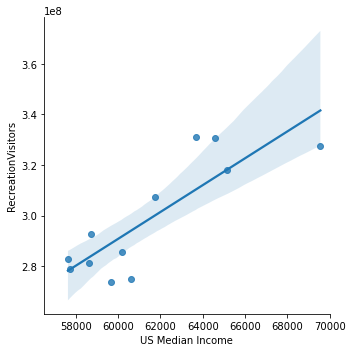

In [117]:
nps_income = sns.lmplot("US Median Income", "RecreationVisitors", data=nps_with_econ)
nps_income.set(xlim =(56500,70000))
plt.tight_layout()
plt.show()

Recreation Visitors Vs. Avg Gas Prices

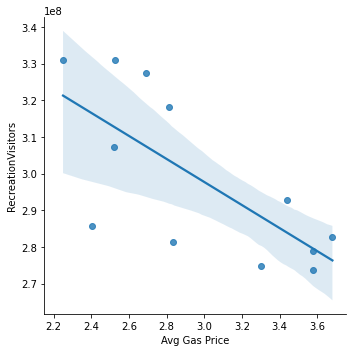

In [118]:
nps_gas = sns.lmplot("Avg Gas Price", "RecreationVisitors", data=nps_with_econ)
nps_gas.set(xlim =(2.15,3.75))
plt.tight_layout()
plt.show()

Analyzing the data

In [343]:
correlation_us_visits = nps_with_econ.corr(method='pearson')
correlation_us_visits = correlation_us_visits['RecreationVisitors']
correlation_us_visits = correlation_us_visits.sort_values(ascending=False)
correlation_us_visits = pd.DataFrame(correlation_us_visits)
correlation_us_visits = correlation_us_visits.rename(columns={'RecreationVisitors': 'Visitor Correlation'})
correlation_us_visits = correlation_us_visits.drop(['RecreationVisitors'])
correlation_us_visits

,Visitor Correlation
Year,0.870099
US Median Income,0.841006
Avg Gas Price,-0.710304


Looking at the data based on popular vs less popular parks

In [180]:
visits_by_park = pd.read_csv('visitsByPark.csv')
visits_by_park = visits_by_park[['Year','RecreationVisitors', 'ParkName']]
visits_mean_by_year = visits_by_park.groupby('Year').agg({'RecreationVisitors': 'mean'})
visits_mean_by_year = visits_mean_by_year.rename(columns={'RecreationVisitors': 'Mean Visits Per Year'})
visits_by_park = pd.merge(visits_by_park,visits_mean_by_year, on='Year')
visits_by_park['Popular'] = visits_by_park['RecreationVisitors'] > visits_by_park['Mean Visits Per Year']
popular_parks = visits_by_park[visits_by_park['Popular'] == True]
unpopular_parks = visits_by_park[visits_by_park['Popular'] == False]
visits_popular = popular_parks.groupby('Year').agg({'RecreationVisitors':'sum'})
visits_popular = pd.merge(visits_popular, economic_factors, on='Year')
visits_unpopular = unpopular_parks.groupby('Year').agg({'RecreationVisitors':'sum'})
visits_unpopular = pd.merge(visits_unpopular, economic_factors, on='Year')

Comparing Popular Parks w/ Income data

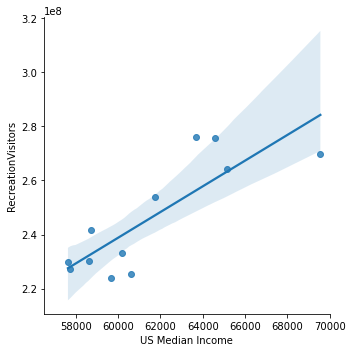

In [183]:
popular_income = sns.lmplot("US Median Income", "RecreationVisitors", data=visits_popular)
popular_income.set(xlim =(56500,70000))
plt.tight_layout()
plt.show()

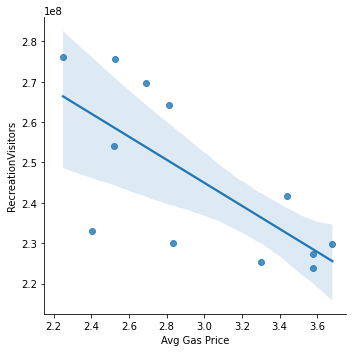

In [184]:
popular_gas = sns.lmplot("Avg Gas Price", "RecreationVisitors", data=visits_popular)
popular_gas.set(xlim =(2.15,3.75))
plt.tight_layout()
plt.show()

In [344]:
correlation_popular = visits_popular.corr(method='pearson')
correlation_popular = correlation_popular['RecreationVisitors']
correlation_popular = correlation_popular.sort_values(ascending=False)
correlation_popular = pd.DataFrame(correlation_popular)
correlation_popular = correlation_popular.rename(columns={'RecreationVisitors': 'Visitor Correlation'})
correlation_popular = correlation_popular.drop(['RecreationVisitors'])
correlation_popular

,Visitor Correlation
Year,0.866347
US Median Income,0.830279
Avg Gas Price,-0.711135


Comparing unpopular parks

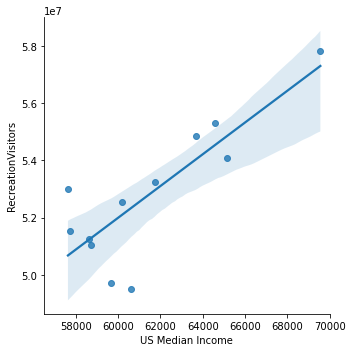

In [355]:
upopular_income = sns.lmplot("US Median Income", "RecreationVisitors", data=visits_unpopular)
upopular_income.set(xlim =(56500,70000))
plt.tight_layout()
plt.show()

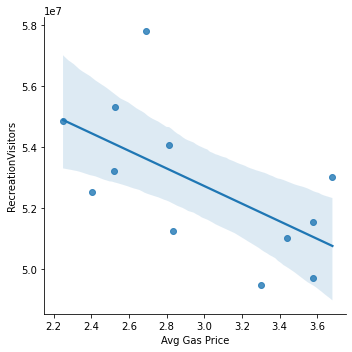

In [360]:
unpopular_gas = sns.lmplot("Avg Gas Price", "RecreationVisitors", data=visits_unpopular,)
unpopular_gas.set(xlim =(2.15,3.75))
plt.tight_layout()
plt.show()

In [334]:
correlation_unpopular = visits_unpopular.corr(method='pearson')
correlation_unpopular = correlation_unpopular['RecreationVisitors']
correlation_unpopular = correlation_unpopular.sort_values(ascending=False)
correlation_unpopular = pd.DataFrame(correlation_unpopular)
correlation_unpopular = correlation_unpopular.rename(columns={'RecreationVisitors': 'Vistors Correlation'})
correlation_unpopular = correlation_unpopular.drop(['RecreationVisitors', 'Year'])
correlation_unpopular

,Vistors Correlation
US Median Income,0.822736
Avg Gas Price,-0.610831


Case 1 - Yosemite

In [341]:
yosemite_data = pd.read_csv('yosemite.csv')
ca_income = pd.read_csv('caincome.csv')
ca_income['DATE'] = pd.to_datetime(ca_income['DATE'])
ca_income['DATE'] = pd.DatetimeIndex(ca_income['DATE']).year
ca_income['DATE'] = pd.to_numeric(ca_income['DATE'])
ca_income = ca_income.rename(columns={'DATE': 'Year', 'MEHOINUSCAA646N': 'CA Median Income'})
ca_gas = pd.read_csv('cagas.csv')
ca_gas = ca_gas.rename(columns={'California All Grades All Formulations Retail Gasoline Prices Dollars per Gallon': 'CA Avg Gas Prices'})
ca_economic_factors = pd.merge(ca_income, ca_gas,on='Year')
yosemite_data = yosemite_data[['Year', 'TRV']]
yosemite_data = yosemite_data.rename(columns={'TRV': 'Yosemite Recreation Visits'})
ca_and_us_econ = pd.merge(economic_factors,ca_economic_factors, on='Year')
yosemite_totals = pd.merge(yosemite_data, ca_and_us_econ, on='Year')
yosemite_corr = yosemite_totals.corr(method='pearson')
yosemite_corr = yosemite_corr['Yosemite Recreation Visits']
yosemite_corr = yosemite_corr.sort_values(ascending=False)
yosemite_corr = pd.DataFrame(yosemite_corr)
yosemite_corr = yosemite_corr.rename(columns={'Yosemite Recreation Visits': 'Correlation to Recreation Visits'})
yosemite_corr = yosemite_corr.drop(['Yosemite Recreation Visits'])

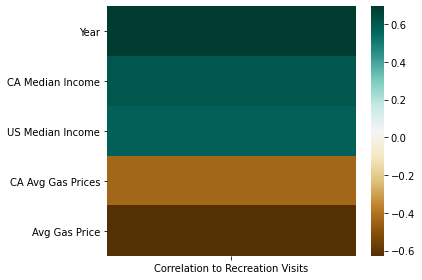

In [342]:
yosemite_heatmap = sns.heatmap(yosemite_corr, cmap='BrBG')
plt.tight_layout()
plt.show()

In [345]:
yosemite_corr

,Correlation to Recreation Visits
Year,0.694617
CA Median Income,0.611716
US Median Income,0.578400
CA Avg Gas Prices,-0.432506
Avg Gas Price,-0.627825


case 2 - Great Basin

In [346]:
great_basin_data = pd.read_csv('greatbasin.csv')
nv_income = pd.read_csv('nvincome.csv')
nv_income['DATE'] = pd.to_datetime(nv_income['DATE'])
nv_income['DATE'] = pd.DatetimeIndex(nv_income['DATE']).year
nv_income['DATE'] = pd.to_numeric(nv_income['DATE'])
nv_income = nv_income.rename(columns={'DATE': 'Year', 'MEHOINUSNVA646N': 'NV Median Income'})
nv_gas = pd.read_csv('nvgas.csv')
nv_gas = nv_gas.rename(columns={'Nevada Total Gasoline Wholesale/Resale Price by Refiners Dollars per Gallon': 'NV Avg Gas Price'})
nv_econ = pd.merge(nv_income,nv_gas,on="Year")
nv_us_econ = pd.merge(nv_econ, economic_factors)
great_basin_data = great_basin_data[['Year', 'TRV']]
great_basin_data = great_basin_data.rename(columns={'TRV': 'Great Basin Recreation Visits'})
great_basin_econ = pd.merge(great_basin_data, nv_us_econ, on='Year')


In [347]:
great_basin_corr = great_basin_econ.corr(method='pearson')
great_basin_corr = great_basin_corr['Great Basin Recreation Visits']
great_basin_corr = great_basin_corr.sort_values(ascending=False)
great_basin_corr = pd.DataFrame(great_basin_corr)
great_basin_corr = great_basin_corr.rename({'Great Basin Recreation Visits': 'Recreation Visits Correlation'})
great_basin_corr = great_basin_corr.drop(['Recreation Visits Correlation'])

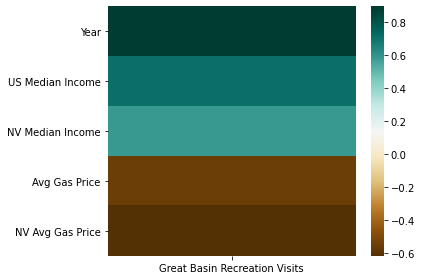

In [348]:
great_basin_heatmap = sns.heatmap(great_basin_corr, cmap='BrBG')
plt.tight_layout()
plt.show()

In [349]:
great_basin_corr

,Great Basin Recreation Visits
Year,0.897551
US Median Income,0.719698
NV Median Income,0.586548
Avg Gas Price,-0.549387
NV Avg Gas Price,-0.614536


In my data I noticed that 'YEAR' is the most correlated with Natl Park growth leading me to believe that economic data is not the best tool to predict National Park vistor growth. Looking at Natl Parks as a whole over the years.

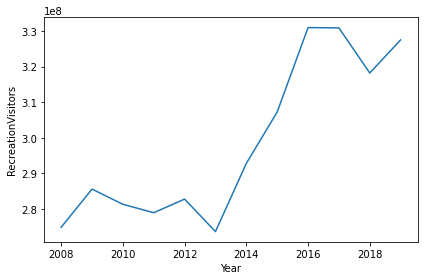

In [363]:
sns.lineplot('Year','RecreationVisitors',data=natl_park_visitors)
plt.tight_layout()
plt.show()

Instagram becomes popular in ~2012 taking a look at that.

In [374]:
est_ig_users = pd.read_csv('igusers.csv')
natl_park_socials = pd.merge(natl_park_visitors, est_ig_users, on='Year')
social_media_corr = natl_park_socials.corr(method='pearson')

In [375]:
natl_park_socials

,Year,RecreationVisitors,Users (millions)
0,2012,282765682,15
1,2013,273630895,110
2,2014,292800082,200
3,2015,307247252,370
4,2016,330971689,500
5,2017,330882751,700
6,2018,318211833,1000
7,2019,327516619,1100


In [378]:
social_media_corr['RecreationVisitors']

Year                  0.868520
RecreationVisitors    1.000000
Users (millions)      0.806982
Name: RecreationVisitors, dtype: float64